In [1]:
import warnings
import polars as pl
import numpy as np

from tqdm.auto import tqdm

warnings.filterwarnings("ignore")

In [2]:
raw_df = pl.read_parquet("datasets/01_tr_density/ist_traffic_density_rev02.zstd")

In [3]:
df = raw_df.clone()
df.head()

DATE_TIME,LATITUDE,LONGITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
datetime[ns],f32,f32,str,u8,u8,u8,u16
2020-01-01 00:00:00,41.047668,28.855591,"""sxk988""",56,6,24,42
2020-01-01 01:00:00,41.047668,28.855591,"""sxk988""",44,7,22,19
2020-01-01 02:00:00,41.047668,28.855591,"""sxk988""",70,6,24,19
2020-01-01 03:00:00,41.047668,28.855591,"""sxk988""",50,6,28,12
2020-01-01 04:00:00,41.047668,28.855591,"""sxk988""",48,6,24,14


In [4]:
# Get column information
column_info = df.schema

# Get data types information
data_types = df.dtypes

# Get number of rows
num_rows = df.height

# Estimate size of the DataFrame
size_bytes = df.estimated_size(unit='gb')

# Display the information
print("Column information:")
for key, value in column_info.items():
    print(key + ':', value)
print()
print("Number of rows:", num_rows)
print()
print("Size (bytes):", np.round(size_bytes, 3), "gb")

Column information:
DATE_TIME: Datetime(time_unit='ns', time_zone=None)
LATITUDE: Float32
LONGITUDE: Float32
GEOHASH: Utf8
MINIMUM_SPEED: UInt8
MAXIMUM_SPEED: UInt8
AVERAGE_SPEED: UInt8
NUMBER_OF_VEHICLES: UInt16

Number of rows: 52910592

Size (bytes): 1.749 gb


In [5]:
df.null_count()

DATE_TIME,LATITUDE,LONGITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,1362213,1362213,1362213,1362213


In [6]:
# Number of unique GEOHASH
len(df['GEOHASH'].unique())

1813

In [7]:
# All GEOHASH have 29184 rows of data
df.groupby('GEOHASH').count().sort('count')

GEOHASH,count
str,u32
"""sxk963""",29184
"""sxkc65""",29184
"""sx7ghb""",29184
"""sxk3gb""",29184
"""sx7cxm""",29184
"""sxkd83""",29184
"""sxk9uy""",29184
"""sxk1t6""",29184
"""sxkdqn""",29184


In [8]:
# Number of hours of missing data for each GEOHASH. 
# Missing value counts are the same for speeds and number of vehicles for each GEOHASH
df.groupby('GEOHASH').agg(pl.col('NUMBER_OF_VEHICLES').null_count()).sort('NUMBER_OF_VEHICLES')

GEOHASH,NUMBER_OF_VEHICLES
str,u32
"""sxk3nt""",668
"""sxk3r9""",669
"""sxk3nk""",669
"""sxk3rs""",670
"""sxk3x8""",670
"""sxk3py""",670
"""sxk3xe""",670
"""sxk90n""",671
"""sxk96q""",671


In [9]:
# Creating a subset of data 
subset_gh = (
    df.filter(pl.col("GEOHASH")=='sxk3he')
    .to_pandas()
    .set_index('DATE_TIME')[['GEOHASH', 'NUMBER_OF_VEHICLES']]
)

print(subset_gh.head())

                    GEOHASH  NUMBER_OF_VEHICLES
DATE_TIME                                      
2020-01-01 00:00:00  sxk3he                39.0
2020-01-01 01:00:00  sxk3he                 3.0
2020-01-01 02:00:00  sxk3he                 1.0
2020-01-01 03:00:00  sxk3he                 1.0
2020-01-01 04:00:00  sxk3he                 2.0


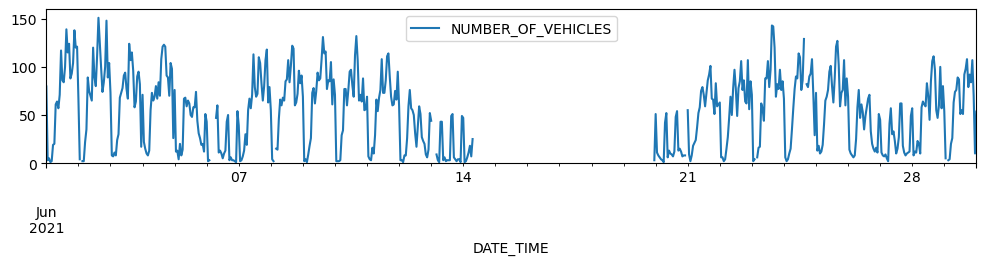

In [10]:
ax = subset_gh.plot(y='NUMBER_OF_VEHICLES', figsize=(12, 2))

# Zooming in to June 2021 period
ax.set_ylim(0, 160)
ax.set_xlim("2021-06-01", "2021-06-30");

#### The above plot depicts the daily time series for `NUMBER_OF_VEHICLES`. Missing values are clearly present in this dataframe, either for who days or a for a few hours a day.

In [11]:
# Saving indexes of missing rows
missing_ix = subset_gh[subset_gh['NUMBER_OF_VEHICLES'].isnull()].index

In [12]:
# Create hour and dayofweek from DATE_TIME
# Then sort rows by HOUR and DAYOFWEEK
# Then linear interpolate in this arrangement. This will capture the hourly and weekly pattern durin interpolation
subset_gh = (
    subset_gh.assign(HOUR=lambda x: x.index.hour,
                     DAYOFWEEK=lambda x: x.index.dayofweek)
    .sort_values(['HOUR', 'DAYOFWEEK'])
    .assign(lin_impute=lambda x:x['NUMBER_OF_VEHICLES'].interpolate("linear", limit_direction="both"))
    .sort_index()
)

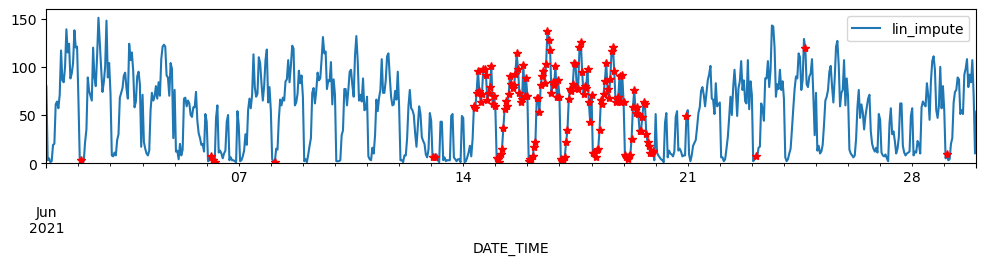

In [14]:
# Plotting filled column and visualize a section of missing hours of data
ax=subset_gh.plot(y='lin_impute', figsize=(12, 2))
subset_gh.loc[missing_ix, 'lin_impute'].plot(ax=ax, linestyle='', marker='*', c='red')


# Zooming in to June 2021 period
ax.set_ylim(0, 160)
ax.set_xlim("2021-06-01", "2021-06-30");

#### it seems it captures the seasonality because it populates some of the missing values by the mean per hour and day of the week, and then the missing values left are interpolated better with the linear interpolation because it works well when the adjacent data values to the missing value are not missing.

In [ ]:
# Mean before imputation
subset_gh['NUMBER_OF_VEHICLES'].mean()

In [ ]:
# Mean After imputation
df_merged['lin_impute'].mean()

##### Only a small change in mean is observed.